<!-- In class, we calculated the Shapley values:

\[
\phi_a = 400, \quad \phi_b = 350, \quad \phi_c = 250
\]

Together they sum to:

\[
\phi_a + \phi_b + \phi_c = 1000 = \text{val}(\{a,b,c\})
\]

This confirms the efficiency property. -->


---
---
---
### Recap / Understanding

In class we calculated the Shapley values:  
$\phi_a = 400$, $\phi_b = 350$, and $\phi_c = 250$,  
based on the model prediction $\text{val}(\{a, b, c\}) = 1000$.

Together they sum to $\phi_a + \phi_b + \phi_c = 1000 = \text{val}(\{a, b, c\})$,  
which confirms the efficiency property and what we want to prove in general.

The Shapley value is the average marginal contribution of one feature $j$ across all possible orders in which features could be added to the input.     
Just like in the 3-feature example, we want to show that summing these average contributions gives back the total model prediction, $\text{val}(N)$.

---

### General Proof

In the slides we considered all the permuations, let $\Pi$ be the set of all $p!$ permutations of the features in $N$.  
And $\pi \in \Pi$ is one such permutation, e.g. as shown in class: $\pi = [c, b, a]$.

Let $P_\pi(j)$ be the set of features that come before $j$ in permutation $\pi$.

Then the marginal contribution of feature $j$ in permutation $\pi$ is:

$$
m_j(\pi) = \text{val}(P_\pi(j) \cup \{j\}) - \text{val}(P_\pi(j))
$$

For example, in the permutation $(b, a, c)$, feature $a$ comes after $b$, so:

$$
m_a(\pi) = \text{val}(\{a, b\}) - \text{val}(\{b\}) = 700 - 300 = 400
$$

This is one of the values used when averaging to compute $\phi_a$.

---

### Now for all permutations

Recap that we want to conisder all the permutations, therefore

$$
\phi_j = \frac{1}{p!} \sum_{\pi \in \Pi} m_j(\pi)
$$

In the example, to compute $\phi_a$, we calculated $m_a(\pi)$ for all 6 permutations and averaged them.

---

### Summing all Shapley values

The original goal was to calculate the sum of all shapey values, therefore we now consider all features of the models prediction:

$$
\sum_{j=1}^p \phi_j = \sum_{j=1}^p \frac{1}{p!} \sum_{\pi \in \Pi} m_j(\pi) = \frac{1}{p!} \sum_{\pi \in \Pi} \sum_{j=1}^p m_j(\pi)
$$

With the example permutation of 
$
\pi = (j_1, j_2, \dots, j_p)
$
We will have growing subsets of features according to the permutations:

- $S_0 = \varnothing$
- $S_1 = \{j_1\}$
- $S_2 = \{j_1, j_2\}$
- $\dots$
- $S_k = \{j_1, \dots, j_k\}$
- $S_p = \{j_1, \dots, j_p\} = N$

The marginal contribution of the $k$-th player in this order is:

$$
m_{j_k}(\pi) = \text{val}(S_k) - \text{val}(S_{k-1})
$$

Summing all of these gives:

$$
\sum_{k=1}^p m_{j_k}(\pi) = \sum_{k=1}^p \left[ \text{val}(S_k) - \text{val}(S_{k-1}) \right]
$$

This is a Teleskopsumme, so all intermediate terms cancel out

$$
= \text{val}(S_p) - \text{val}(S_0) = \text{val}(N) - \text{val}(\varnothing) = \text{val}(N)
$$

---
### To understand this better, here applied on the example in the slides

growing subsets of features for the permutations
- $S_0 = \varnothing$
- $S_1 = \{b\}$
- $S_2 = \{b, a\}$
- $S_3 = \{b, a, c\} = \{a, b, c\}$

The marginal contributions are

- $m_b(\pi) = \text{val}(S_1) - \text{val}(S_0) = \text{val}(\{b\}) - \text{val}(\varnothing) = 300 - 0 = 300$
- $m_a(\pi) = \text{val}(S_2) - \text{val}(S_1) = \text{val}(\{a, b\}) - \text{val}(\{b\}) = 700 - 300 = 400$
- $m_c(\pi) = \text{val}(S_3) - \text{val}(S_2) = \text{val}(\{a, b, c\}) - \text{val}(\{a, b\}) = 1000 - 700 = 300$

When summing we see how it reduces to \text{val}(N)

$$
\sum_{k=1}^3 m_{j_k}(\pi) = (300 - 0) + (700 - 300) + (1000 - 700) = 1000
$$



---


In every permutation, the sum of all marginal contributions equals the full model prediction:

$$
\sum_{j=1}^p m_j(\pi) = \text{val}(N)
$$

So:

$$
\sum_{j=1}^p \phi_j = \frac{1}{p!} \sum_{\pi \in \Pi} \text{val}(N) = \frac{p! \cdot \text{val}(N)}{p!} = \text{val}(N)
$$



In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("bike.csv")
features = ['season', 'mnth', 'weekday', 'holiday', 'workday', 'weather',
            'temp', 'hum', 'windspeed', 'days_since_2011', 'cnt_2d_bfr', 'yr']
X = pd.get_dummies(df[features], drop_first=True)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print("R²  :", r2_score(y_test, preds))
print("MAE :", mean_absolute_error(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


R²  : 0.8539247878587939
MAE : 467.18838356164383
RMSE: 738.660687532825


The first 5 rows of SHAP values:
          temp         hum   windspeed  days_since_2011  cnt_2d_bfr  \
0 -1201.819958  128.185374   49.911372     -1567.677013 -497.063862   
1  -515.975961 -600.537666  201.358078      -456.273599 -263.298380   
2  -847.968043   50.377980  153.657365      -571.559165 -621.571164   
3   693.188681   80.282131  109.675799      1214.410120  240.119721   
4  -272.891574  207.427135  -19.213893      1022.619367  182.814551   

          yr  season_SPRING  season_SUMMER  season_WINTER  mnth_AUG  ...  \
0  -6.920965      -0.192689      -0.589226     -25.596367  0.293291  ...   
1 -11.678742       1.194094      -1.521336      13.830156  0.843236  ...   
2 -15.351721       1.106189      -0.537480      12.257040  0.771192  ...   
3   8.505764      -1.111529      -3.291006       4.399125 -0.484567  ...   
4   8.054328      -0.280704       1.317378       4.190850 -0.159766  ...   

   weekday_MON  weekday_SAT  weekday_SUN  weekday_THU  weekday_TUE  \
0     3.26053

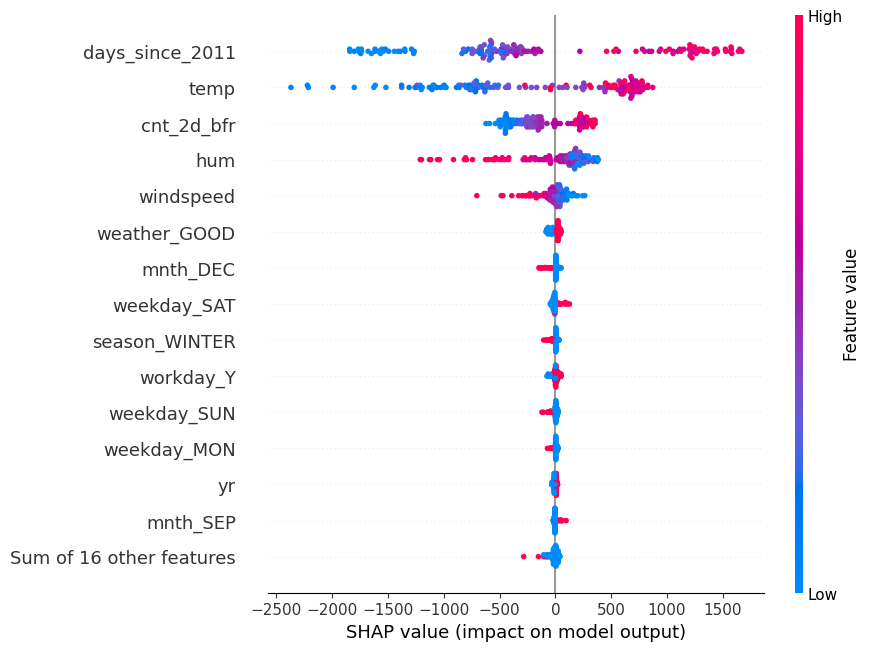

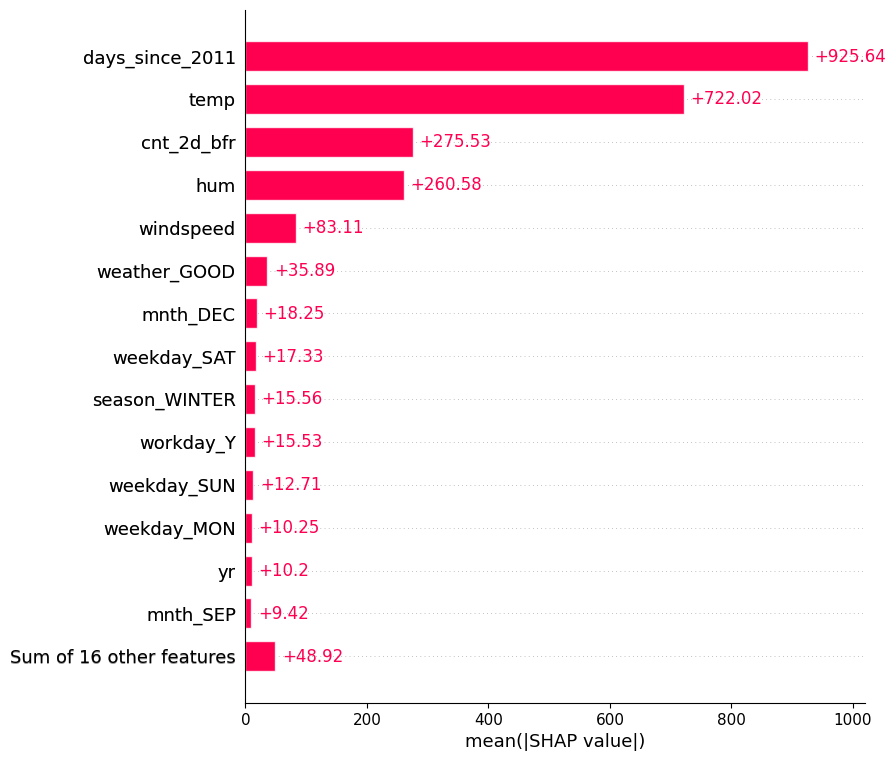

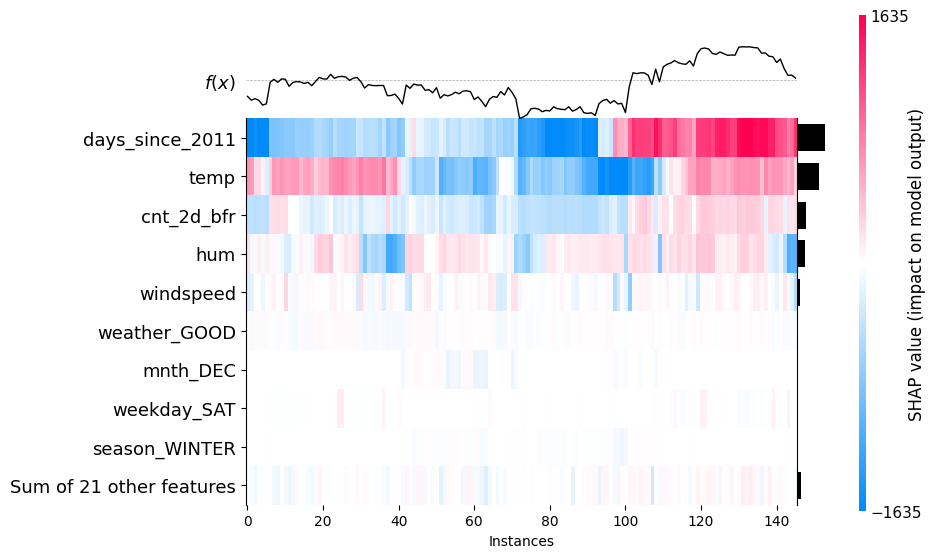

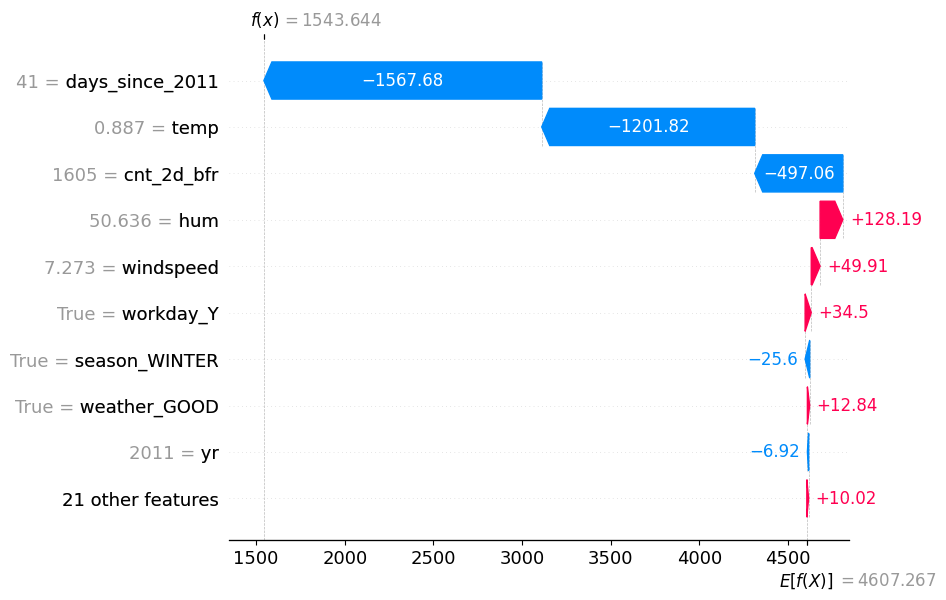

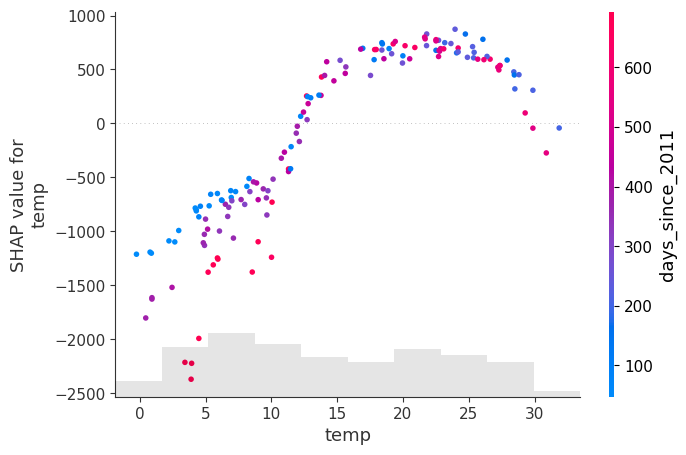

In [9]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf)
shap_values = explainer(X_test)

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
print("The first 5 rows of SHAP values:")
print(shap_df.head())

shap.plots.beeswarm(shap_values, max_display=15)
shap.plots.bar(shap_values, max_display=15)

shap.plots.heatmap(shap_values)

sample_idx = 0 
shap.plots.waterfall(shap_values[sample_idx])
shap.plots.scatter(shap_values[:, "temp"], color=shap_values)

shap.plots.initjs()
shap.plots.force(shap_values[sample_idx])


Exact:
- model agnostic, can be used with any model
- O(2^m) (for Shapley values), completely enumerates space of masking patterns
- can use optimizations such as grey code to minimize number of inputs → reduces time model needs to be called
- for standard Shapley values, suitable for maskers and models with less than 15 features which vary from background per sample
- for Owen values with clustering and less than ~100 features

Sampling Explainer:
- assumed feature independence
- samples feature permutations randomly to estimate SHAP values
- faster than ExactExplainer for larger feature sets, but can be slow overall

Kernel Explainer:
- model agnostic, good for non-tree models with manageable feature count or where sampling is acceptable
- weighted linear regression approach over sampled coalitions
- approximation, becomes exact only if you fully enumerate subsets
- high computational cost, grows fast with feature count

Tree Explainer:
- uses TreeSHAP algorithm, fast, exact computation, exploits tree structure
- exact accuracy, can be configured
- very fast, polynomial, depends on number of trees, leaves, and depth; vastly more efficient than general explainers
- used for tree-based models only, by far most performant

Table:

| Explainer         | Model Type     | Accuracy       | Speed / Complexity     | Notes                                                        |
|-------------------|----------------|----------------|-------------------------|--------------------------------------------------------------|
| ExactExplainer     | any model      | exact          | O(2^m)                  | best for ≤15 features; uses grey code optimizations          |
| SamplingExplainer  | any model      | approximate    | depends on samples      | scales better than exact, but still slow with large datasets |
| KernelExplainer    | any model      | approximate    | grows with features     | uses regression on sampled coalitions                        |
| TreeExplainer      | tree models    | exact          | polynomial in tree size | fastest and most efficient for tree ensembles                |

Sources:
1. https://shap.readthedocs.io/en/latest/generated/shap.ExactExplainer.html
2. https://shap.readthedocs.io/en/latest/generated/shap.SamplingExplainer.html
3. https://shap.readthedocs.io/en/latest/generated/shap.KernelExplainer.html
4. https://shap.readthedocs.io/en/latest/generated/shap.TreeExplainer.html
5. https://christophm.github.io/interpretable-ml-book/shap.html
6. https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf
7. https://github.com/slundberg/shap/issues
